In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import pymc.sampling_jax
from scipy.stats import beta
from scipy.integrate import quad
import arviz as az

/Users/corrado/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
p = np.array([0.2, 0.5, 0.3])
q = np.array([0.1, 0.6, 0.3])

In [4]:
h_p = -np.sum(p * np.log2(p))
print("Entropia di p: ", h_p)

Entropia di p:  1.4854752972273344


In [5]:
h_pq = -np.sum(p * np.log2(q))
print("Entropia incrociata tra p e q: ", h_pq)

Entropia incrociata tra p e q:  1.5539580943104374


In [6]:
kl_pq = h_pq - h_p
print("Divergenza KL da p a q: ", kl_pq)

Divergenza KL da p a q:  0.06848279708310301


In [7]:
# Define the parameters
n = 4
p = 0.2

# Compute the probability mass function
true_py = stats.binom.pmf(range(n + 1), n, p)
print(true_py)

[0.4096 0.4096 0.1536 0.0256 0.0016]


In [8]:
q1 = np.array([0.46, 0.42, 0.10, 0.01, 0.01])
print(q1)

[0.46 0.42 0.1  0.01 0.01]


In [9]:
q2 = [0.2] * 5
print(q2)

[0.2, 0.2, 0.2, 0.2, 0.2]


In [10]:
kl_pq1 = np.sum(true_py * np.log(true_py / q1))
print("Divergenza KL da p a q1: ", kl_pq1)

Divergenza KL da p a q1:  0.029251990333458974


In [11]:
kl_pq2 = np.sum(true_py * np.log(true_py / q2))
print("Divergenza KL da p a q2: ", kl_pq2)

Divergenza KL da p a q2:  0.4863577787141543


In [12]:
# Definire le distribuzioni p e q
p = np.array([0.01, 0.99])
q = np.array([0.7, 0.3])

# Calcolo dell'entropia di p
h_p = -np.sum(p * np.log(p))

# Calcolo dell'entropia incrociata da p a q
h_pq = -np.sum(p * np.log(q))

# Calcolo della divergenza KL da p a q
kl_pq = h_pq - h_p

# Calcolo dell'entropia di q
h_q = -np.sum(q * np.log(q))

# Calcolo dell'entropia incrociata da q a p
h_qp = -np.sum(q * np.log(p))

# Calcolo della divergenza KL da q a p
kl_qp = h_qp - h_q

print(f"Entropia di p: {h_p}")
print(f"Entropia incrociata da p a q: {h_pq}")
print(f"Divergenza KL da p a q: {kl_pq}")

print(f"\nEntropia di q: {h_q}")
print(f"Entropia incrociata da q a p: {h_qp}")
print(f"Divergenza KL da q a p: {kl_qp}")

Entropia di p: 0.056001534354847345
Entropia incrociata da p a q: 1.1954998257220641
Divergenza KL da p a q: 1.1394982913672167

Entropia di q: 0.6108643020548935
Entropia incrociata da q a p: 3.226634230947714
Divergenza KL da q a p: 2.6157699288928207


In [13]:
np.random.seed(75)

# Number of samples
n = 10000

# Draw samples from a Beta distribution
y_data = np.random.beta(1, 3, n)
print(y_data[:6])

[0.21810354 0.05532253 0.13545025 0.42102514 0.14728608 0.11052926]


In [14]:
# True distribution
def p_t(y):
    return beta.pdf(y, 1, 3)

# Predictive distribution
def p(y):
    return beta.pdf(y, 2, 2)

# Integration
def integrand(y):
    return p_t(y) * np.log(p(y))

# Perform numerical integration
result, error = quad(integrand, 0, 1)

print(result)

-0.37490719743844486


In [15]:
print(error)

3.0229152514493762e-12


In [16]:
1 / n * np.sum(np.log(p(y_data)))

-0.3721938430299501

In [17]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y_true = 3 + 2 * X
y_obs = y_true + np.random.normal(scale=3, size=100)

In [18]:
# Linear model
with pm.Model() as linear_model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    mu = alpha + beta * X
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=y_obs)

In [19]:
with linear_model:
    linear_trace = pm.sampling_jax.sample_numpyro_nuts(idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.077454


Sampling...


  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                            | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                            | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                            | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                            | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                         | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                         | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                         | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                         | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1257.67it/s]


Running chain 1: 100%|████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1258.33it/s]


Running chain 2: 100%|████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1259.33it/s]


Running chain 3: 100%|████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1260.33it/s]


Sampling time = 0:00:01.992571


Transforming variables...


Transformation time = 0:00:00.066762


Computing Log Likelihood...


Log Likelihood time = 0:00:00.143633


In [20]:
# Intercept model
with pm.Model() as intercept_model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    mu = alpha 
    y = pm.Normal("y", mu=mu, observed=y_obs)

In [21]:
with intercept_model:
    intercept_trace = pm.sampling_jax.sample_numpyro_nuts(idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.221959


Sampling...


  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                            | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                            | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                            | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                            | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                         | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                         | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                         | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                         | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1975.20it/s]


Running chain 1: 100%|████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1976.87it/s]


Running chain 2: 100%|████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1979.14it/s]


Running chain 3: 100%|████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1981.57it/s]


Sampling time = 0:00:01.050806


Transforming variables...


Transformation time = 0:00:00.024544


Computing Log Likelihood...


Log Likelihood time = 0:00:00.060467


In [22]:
linear_loo = az.loo(linear_trace)
linear_loo

Computed from 4000 posterior samples and 100 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -244.62     6.90
p_loo        2.89        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      100  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [23]:
intercept_loo = az.loo(intercept_trace)
intercept_loo

Computed from 4000 posterior samples and 100 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -2251.95   195.88
p_loo       42.41        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      100  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [24]:
df_comp_loo = az.compare({"linear_model": linear_trace, "intercept_model": intercept_trace})
df_comp_loo

/Users/corrado/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/corrado/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'log' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
linear_model,0,-244.619230,2.893086,0.000000,1.0,6.896382,0.000000,False,log
intercept_model,1,-2251.945524,42.411287,2007.326295,0.0,195.880997,195.551458,False,log


/Users/corrado/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/compareplot.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale = comp_df["scale"][0]


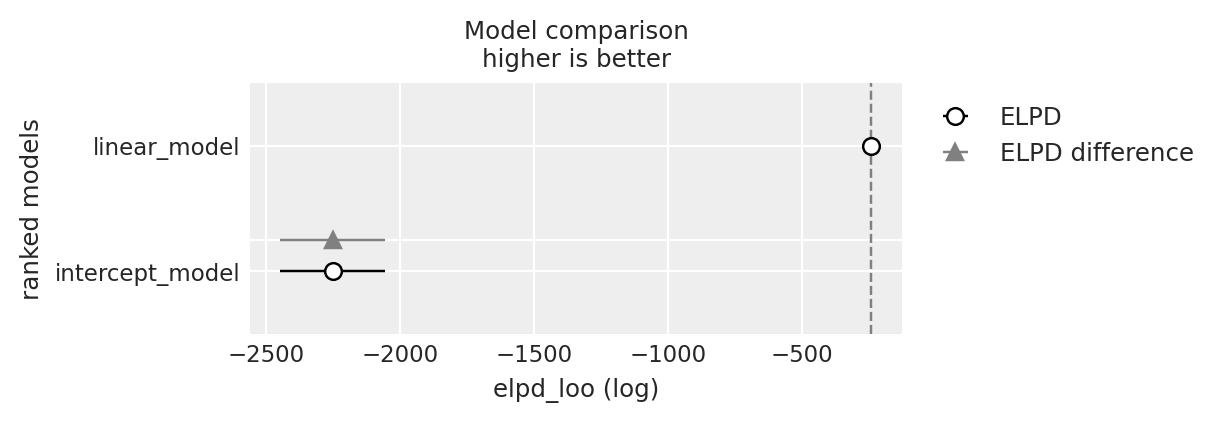

In [25]:
az.plot_compare(df_comp_loo, insample_dev=False);

In [26]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Dec 10 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

scipy      : 1.11.4
matplotlib : 3.8.2
seaborn    : 0.13.0
numpy      : 1.26.2
statsmodels: 0.14.0
arviz      : 0.16.1
pandas     : 2.1.3
pymc       : 5.10.0

Watermark: 2.4.3

